In [29]:
import pandas as pd
import numpy as np

In [30]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm',
        'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [31]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [32]:
cars['normalized-losses'] = cars['normalized-losses'].replace('?', np.nan)

In [33]:
len(cars.dropna())/len(cars)

0.8

About 20% of data has incomplete column 'normalized-losses'. It is better to drop it off entirely

In [34]:
cars = cars.drop(columns=['normalized-losses'])

In [35]:
cars.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


There's also a column 'num-of-cylinders' that is basically numerical but written in letters; it's better be converted

In [36]:
num_of_cylinders = {
    'eight': 8,
    'five':  5,
    'four':  4,
    'six':   6,
    'three': 3,
    'twelve':12,
    'two':   2
}
cars['num-of-cylinders'] = cars['num-of-cylinders'].map(num_of_cylinders)

In [40]:
numeric_columns = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
                   'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm',
                   'city-mpg', 'highway-mpg']

In [41]:
cars_features = cars[numeric_columns].copy()
cars_features['price'] = cars['price']

In [42]:
cars_features.head()

,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495
1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500
2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500
3,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950
4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450


In [43]:
cars_features = cars_features.replace('?', np.nan)

In [44]:
len(cars_features.dropna())/len(cars_features)

0.9512195121951219

Since the NaN values are now less than 3% we can safely drop them

In [45]:
cars_features = cars_features.dropna()

In [46]:
cars_features = cars_features.astype(float)

In [47]:
cars_features[numeric_columns] = (cars_features[numeric_columns]
      - cars_features[numeric_columns].mean()) / (cars_features[numeric_columns].std())

In [48]:
cars_features.head()

,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,-1.679117,-0.437378,-0.837593,-2.111810,-0.020964,-0.407729,0.049755,0.517224,-1.815604,-0.294176,0.204073,-0.212456,-0.683346,-0.562432,13495.0
1,-1.679117,-0.437378,-0.837593,-2.111810,-0.020964,-0.407729,0.049755,0.517224,-1.815604,-0.294176,0.204073,-0.212456,-0.683346,-0.562432,16500.0
2,-0.716957,-0.245016,-0.181082,-0.609793,0.503130,1.555410,0.580721,-2.388623,0.699402,-0.294176,1.339545,-0.212456,-0.995779,-0.708860,16500.0
3,0.147356,0.187800,0.147174,0.182938,-0.423086,-0.407729,-0.457076,-0.512697,0.476553,-0.047998,-0.033583,0.855301,-0.214697,-0.123149,13950.0
4,0.082124,0.187800,0.240961,0.182938,0.505035,0.573840,0.194564,-0.512697,0.476553,-0.540353,0.309699,0.855301,-1.151995,-1.294570,17450.0


Data is normalized now

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [69]:
rmses = dict()

def knn_train_test(feature_col, target_col, df, k=5):
    split_index = int(len(cars_features)*0.75)
    full_set = df.copy()
    full_set = full_set.sample(frac=1).reset_index(drop=True)
    
    train_df = full_set.iloc[0:split_index]
    test_df = full_set.iloc[split_index:]
    
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    knn.fit(train_df[[feature_col]], train_df[target_col])
    
    mse = mean_squared_error(knn.predict(test_df[[feature_col]]), test_df[target_col])
    rmse = mse**0.5
    
    rmses[feature_col] = rmse

In [70]:
for column in numeric_columns:
    knn_train_test(column, 'price', cars_features)


In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

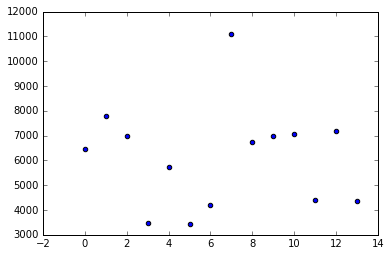

In [78]:
plt.scatter([x for x in range(0, len(numeric_columns))], [rmses[k] for k in rmses])
plt.show()

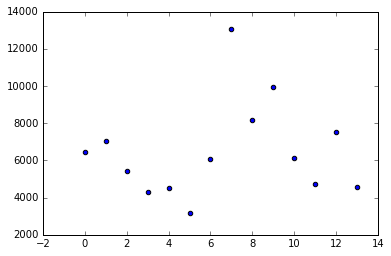

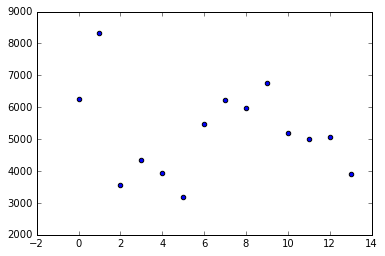

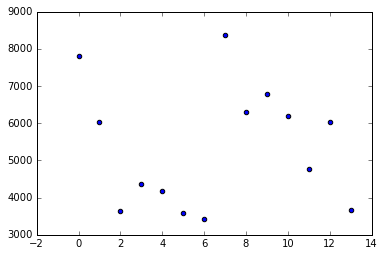

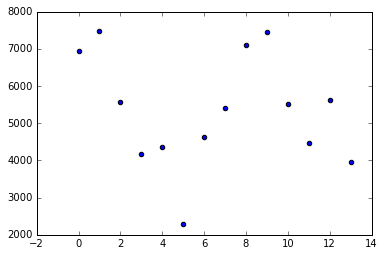

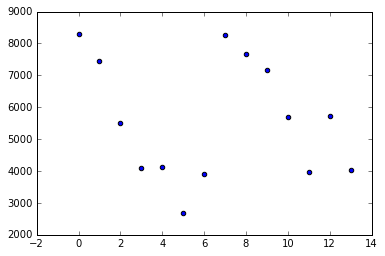

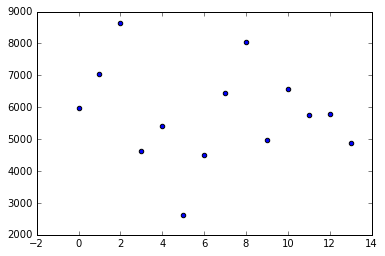

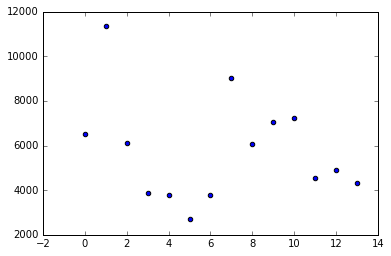

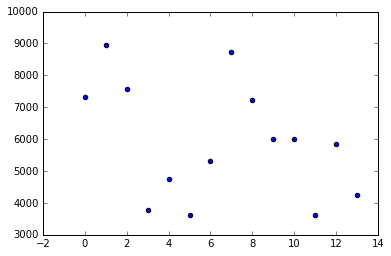

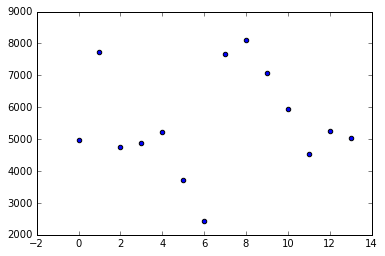

In [80]:
global_rmses = dict()
for k in range(1, 10):
    rmses = dict()
    for column in numeric_columns:
        knn_train_test(column, 'price', cars_features, k)
    plt.scatter([x for x in range(0, len(numeric_columns))], [rmses[k] for k in rmses])
    plt.show()
    global_rmses[k] = np.mean([rmses[k] for k in rmses])


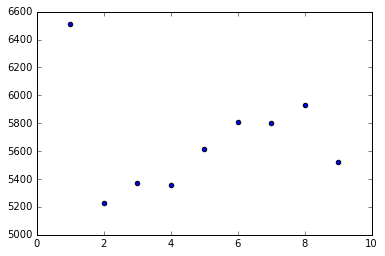

In [82]:
plt.scatter([x for x in range(1, 10)], [global_rmses[k] for k in global_rmses])
plt.show()

# Knn performs best with k in [2...4]

In [83]:
rmses = dict()
for column in numeric_columns:
    knn_train_test(column, 'price', cars_features, 3)

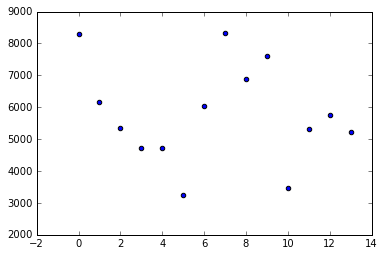

In [84]:
plt.scatter([x for x in range(0, len(numeric_columns))], [rmses[k] for k in rmses])
plt.show()

In [85]:
rmses_sorted_by_value = sorted(rmses.items(), key=lambda kv: kv[1])

In [86]:
rmses_sorted_by_value

[('engine-size', 3247.4043816080366),
 ('length', 3465.4024719384333),
 ('city-mpg', 4728.472371522749),
 ('width', 4731.703920463505),
 ('horsepower', 5238.298233296036),
 ('highway-mpg', 5309.434044724866),
 ('wheel-base', 5365.06432030388),
 ('num-of-cylinders', 5759.519842712073),
 ('curb-weight', 6047.7957197666),
 ('height', 6151.463249963073),
 ('bore', 6886.506870178514),
 ('stroke', 7597.804595636123),
 ('compression-rate', 8288.19833043502),
 ('peak-rpm', 8322.246983393832)]

In [93]:
best_features = [rmses_sorted_by_value[x][0] for x in range(0, len(rmses_sorted_by_value))]
print(best_features)

['engine-size', 'length', 'city-mpg', 'width', 'horsepower', 'highway-mpg', 'wheel-base', 'num-of-cylinders', 'curb-weight', 'height', 'bore', 'stroke', 'compression-rate', 'peak-rpm']


In [88]:
def knn_train_test(feature_cols, target_col, df, k=5):
    split_index = int(len(cars_features)*0.75)
    full_set = df.copy()
    full_set = full_set.sample(frac=1).reset_index(drop=True)
    
    train_df = full_set.iloc[0:split_index]
    test_df = full_set.iloc[split_index:]
    
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    knn.fit(train_df[feature_cols], train_df[target_col])
    
    mse = mean_squared_error(knn.predict(test_df[feature_cols]), test_df[target_col])
    rmse = mse**0.5
    return rmse

In [95]:
rmses = dict()
for i in range(1, len(best_features)):
    features = best_features[:i]
    rmses[i] = knn_train_test(features, 'price', cars_features, 3)
    
print(rmses)

{1: 2803.9889888216585, 2: 2885.0820138702074, 3: 3439.6470370125226, 4: 3233.028086439979, 5: 2182.751037789358, 6: 2630.1554427564206, 7: 2622.633550313315, 8: 2330.701882060112, 9: 5137.970494756531, 10: 3471.0556174992707, 11: 3794.079428497849, 12: 2157.110300395546, 13: 3732.7355279395233}


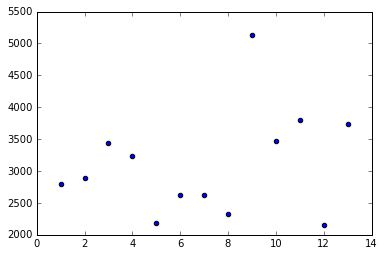

In [97]:
plt.scatter([x for x in range(1, len(best_features))], [rmses[k] for k in rmses])
plt.show()

# Best models use 5, 8 and 12 features

detect optimal K for each model

2137.5399639552165


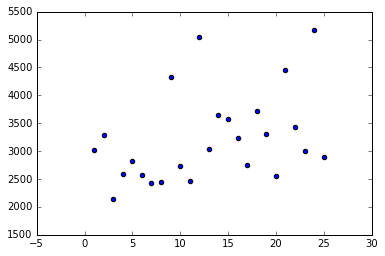

2292.5228980525444


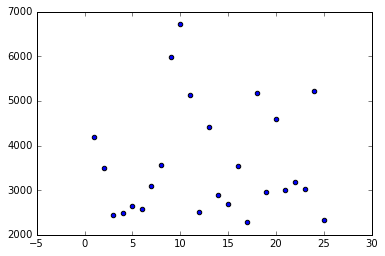

1807.6962199392813


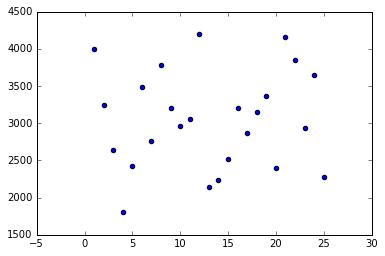

In [103]:
for i in [5, 8, 12]:
    rmses = dict()
    for k in range(1, 26):
        features = best_features[:i]
        rmses[k] = knn_train_test(features, 'price', cars_features, 3)
    print(min([rmses[y] for y in rmses]))
    plt.scatter([x for x in rmses], [rmses[y] for y in rmses])
    plt.show()

# Best hyperparameters are: 5 features => k=3; 8 features => k=17, 12 features => k=4